このPython コードは、PyMC を使ってMCMCサンプリングを行います。
* 2025年8月時点では、Google Colaboratory環境では PyMC がそのまま使えますので、実行可能です。
* ローカルな計算機環境では、PyMC パッケージが含まれていないのが一般的です。
    * 例えば、Anaconda などの Distribution では、以下の例の様に、PyMC環境を用意する必要があります。
        ```
        conda create -c conda-forge -n pymc_env pymc
        conda activate pymc_env
        conda install conda-forge::ipywidgets
        conda install scikit-learn
        ```
        * これで VS codeの実行時のPython環境に、```pymc_env```を選択します。

ベースディレクトリと、出力ディレクトリを設定します。

In [1]:
############################################
BaseDir   = 'IntroDDSJpn/Chap00/'
OutputDir = '0Python-PyMC/'

Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )
############################################
# 出力先のフォルダ(ディレクトリ)を準備
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap00/
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap00/0Python-PyMC/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap00/0Python-PyMC/


NumPy: Pythonで数値計算や配列を効率的に行うためのパッケージ
* https://numpy.org/
* NumPy Reference: https://numpy.org/doc/stable/reference/index.html

Matplotlib: Python/NumPyのためのグラフ描画パッケージ
* https://matplotlib.org/
* API Reference: https://matplotlib.org/stable/api/index

In [3]:
############################################
import numpy as np
import numpy.random as rd
print('numpy      Ver.', np.__version__)
############################################
# Python/NumPyのためのグラフ描画パッケージ
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)

numpy      Ver. 1.26.4
matplotlib Ver. 3.10.0


pymc: PythonでMCMCを実現するパッケージ
* https://www.pymc.io/welcome.html

In [4]:
############################################
# PythonでMCMCを実現するパッケージ
import pymc as pm
print('pymc       Ver.', pm.__version__)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


pymc       Ver. 5.16.1


解析するデモデータ(直線回帰)

In [5]:
######################################
# 解析するデモデータ(直線回帰)
N = 51
#
X = np.linspace(-2.5,2.5, num=N, endpoint=True )
#
a_true = 2.0
b_true = 0.3
Y_true = a_true * X + b_true
#
sigma_noise = 1E0
Y_noise = np.random.normal( loc=0, scale=sigma_noise, size=N )
#
Y = Y_true + Y_noise

データのグラフを描く

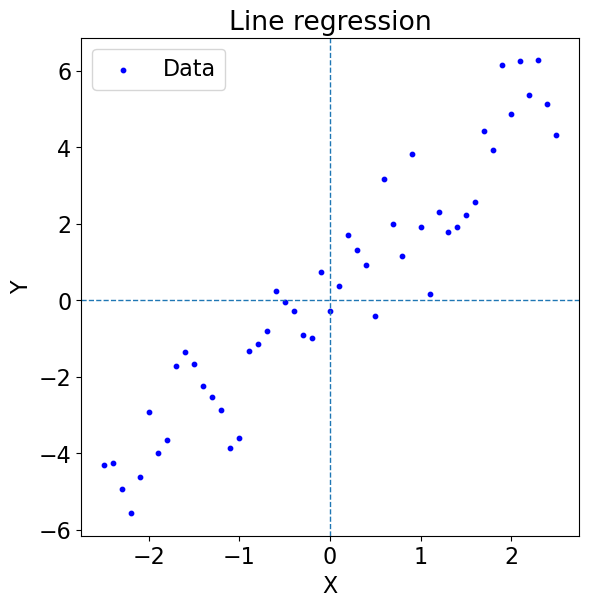

In [6]:
######################################
# データのグラフを描く
plt.rcParams['font.size'] = 16
#
fig = plt.figure( figsize=(6,6) )
#
fig.subplots_adjust(left=0.15, right=0.98, top=0.93, bottom=0.1)
#
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
#
ax1.scatter(X, Y, color='blue', s=10.0, label='Data' )
#
(x_left, x_right) = ax1.set_xlim()
(y_bot, y_top) = ax1.set_ylim()
#
ax1.hlines(0, x_left, x_right, linestyles='dashed', linewidth=1.0)
ax1.vlines(0, y_bot, y_top,    linestyles='dashed', linewidth=1.0)
#
plt.title(  'Line regression' )
plt.legend()
#
fig.savefig( FilePath + 'PyMC-Ydata-01' )

PyMCによるMCMCサンプリング

In [7]:
######################################
with pm.Model() as  model:
    #
    a    = pm.Normal('a', mu=0, sigma=2 )
    b    = pm.Normal('b', mu=0, sigma=1 )
    rmsd = pm.Uniform('rmsd', lower=0, upper=10)
    y    = pm.Normal('y', mu=a*X+b, sigma=rmsd, \
                     observed=Y)
    # start = pm.find_MAP()
    # step  = pm.NUTS(state=start)
    trace = pm.sample(1000, tune=1000, chains=2 )
#

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, b, rmsd]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 16 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [8]:
######################################
# サンプリング結果のまとめ
summary = pm.summary(trace)
summary_a = pm.summary(trace,['a'])
summary_b = pm.summary(trace,['b'])
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,2.047,0.102,1.861,2.243,0.002,0.002,2568.0,1660.0,1.0
b,0.281,0.145,0.029,0.581,0.003,0.003,2544.0,1602.0,1.0
rmsd,1.078,0.119,0.892,1.317,0.002,0.003,2888.0,1440.0,1.0


In [9]:
######################################
a_mean = float( summary_a['mean'].iloc[0] )
print( a_mean )
a_sd   = float( summary_a['sd'].iloc[0] )
print( a_sd )
b_mean = float( summary_b['mean'].iloc[0] )
print( b_mean )
b_sd   = float( summary_b['sd'].iloc[0] )
print( b_sd )

2.047
0.102
0.281
0.145


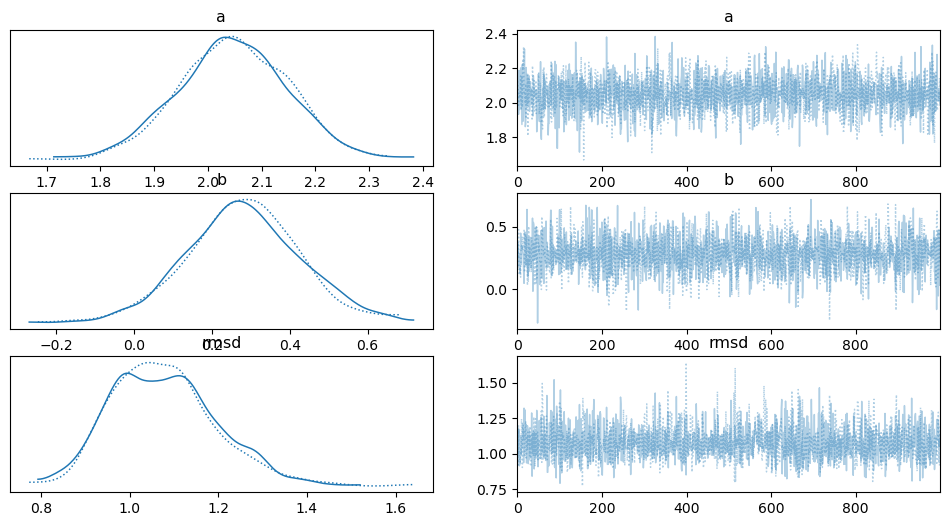

In [10]:
######################################
pm.plot_trace(trace)
#
# 現在のクラフ
fig = plt.gcf()
fig.savefig( FilePath + 'PyMC-traceplot-01')